# WeatherPy
----

### Analysis
* The weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). Northern hemisphere appears to be colder than Southern hemisphere at this time of the year
* There is not a strong relation between latitude and humidity or cloudiness. A majority of the cities have huidities between 80 and 100%. (probably good for umbrella sales? :-))
* There is no strong relationship between latitude and wind speed. However, in northern hemisphere there are a bunch of cities at ~60 degree lattitude that has higher than average windspeeds (>25 mph)
* Additional analysis: Calculated correlation between a variable created to signify distance from equator (absolute value of lattitude) and the various factors and Maximum Temperature was much more significant correlated (correlation coefficient of -0.79) than other variables. This clearly shows with an increase of the distance from the equator the temprature drops


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [18]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [29]:
print(len(cities))
print(lat[1])
print(hum[1])
print(cloud[1])
print(windsp[1])
print(temp[1])
print(tempmax[1])
print(tempmin[1])
print(len(tempmin))
print(len(tempmax))
print(len(temp))

610
-54.81
86
90
21.92
37.4
37.4
37.4
550
550
550


In [22]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# set up lists to hold reponse info
lat = []
lon=[]
citylst=[]
temp = []
tempmax = []
tempmin = []
hum= []
cloud= []
windsp= []
country=[]
dt=[]
i=0
j=0

# Loop through the list of cities and perform a request for data on each
print ("Beginning Data Retrieval")
print ("--------------------------------")
for city in cities:
    response = requests.get(query_url + city).json()
    if response['cod'] != '404':
        i=i+1
        print (f"Processing record for {i} | {city}")
        citylst.append(response['name'])
        country.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        tempmax.append(response['main']['temp_max'])
        tempmin.append(response['main']['temp_min'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        windsp.append(response['wind']['speed'])
        dt.append(response['dt'])
    else:
        j=j+1
        print(f"City not found. Skipping... total skipped so far: {j}")

Beginning Data Retrieval
--------------------------------
Processing record for 1 | songwa
Processing record for 2 | ushuaia
Processing record for 3 | hermanus
Processing record for 4 | busselton
Processing record for 5 | homer
Processing record for 6 | victoria
Processing record for 7 | rikitea
Processing record for 8 | albany
Processing record for 9 | chokurdakh
Processing record for 10 | chuy
Processing record for 11 | izazi
Processing record for 12 | bredasdorp
Processing record for 13 | kudahuvadhoo
Processing record for 14 | port alfred
Processing record for 15 | port-gentil
Processing record for 16 | ayan
Processing record for 17 | fonte boa
Processing record for 18 | sitka
Processing record for 19 | airai
Processing record for 20 | nome
Processing record for 21 | broome
Processing record for 22 | norman wells
Processing record for 23 | mumbwa
Processing record for 24 | hellebaek
Processing record for 25 | vila velha
Processing record for 26 | hithadhoo
Processing record for 27 

Processing record for 197 | suleja
Processing record for 198 | itarema
Processing record for 199 | avera
Processing record for 200 | chapais
Processing record for 201 | borogontsy
Processing record for 202 | millinocket
Processing record for 203 | te anau
Processing record for 204 | hofn
Processing record for 205 | copiapo
Processing record for 206 | goderich
Processing record for 207 | nikolskoye
Processing record for 208 | nicoya
Processing record for 209 | sabang
Processing record for 210 | waipawa
Processing record for 211 | cabedelo
Processing record for 212 | alta floresta
Processing record for 213 | aklavik
Processing record for 214 | baghmara
Processing record for 215 | nagorsk
Processing record for 216 | kaitangata
Processing record for 217 | kavieng
Processing record for 218 | bud
Processing record for 219 | simao
Processing record for 220 | kruisfontein
Processing record for 221 | mogadishu
Processing record for 222 | salalah
Processing record for 223 | magadi
Processing rec

Processing record for 386 | cururupu
Processing record for 387 | pilar
Processing record for 388 | erenhot
Processing record for 389 | jiangyou
Processing record for 390 | aksu
Processing record for 391 | sucua
Processing record for 392 | genhe
Processing record for 393 | constantine
Processing record for 394 | sheridan
Processing record for 395 | neiafu
Processing record for 396 | garissa
Processing record for 397 | mehamn
Processing record for 398 | arman
City not found. Skipping... total skipped so far: 41
Processing record for 399 | atar
Processing record for 400 | tabou
Processing record for 401 | la ronge
Processing record for 402 | itauna
Processing record for 403 | debno
Processing record for 404 | matveyevka
Processing record for 405 | evensk
Processing record for 406 | santa rosa
City not found. Skipping... total skipped so far: 42
Processing record for 407 | doha
Processing record for 408 | vanavara
Processing record for 409 | mackay
Processing record for 410 | iskateley
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [30]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": citylst,
    "country": country,
    "lon": lon,
    "lat": lat,
    "temp": temp,
    "max_temp": tempmax,
    "min_temp": tempmin,
    "humidity": hum,
    "cloudiness": cloud,
    "WindSpeed": windsp,
    "Date": dt
}
weather_data = pd.DataFrame(weather_dict)
print(weather_data.head())
#Export to CSV (retain intital API request data to avoid multiple calls)
weather_data.to_csv('weather_data.csv', index=False)

,city,country,lon,lat,temp,max_temp,min_temp,humidity,cloudiness,WindSpeed,Date
0,Songwa,TZ,33.52,-3.51,69.36,69.36,69.36,51,0,12.77,1538180883
1,Ushuaia,AR,-68.31,-54.81,37.40,37.40,37.40,86,90,21.92,1538175600
2,Hermanus,ZA,19.24,-34.42,44.61,44.61,44.61,91,56,1.92,1538180909
3,Busselton,AU,115.35,-33.64,59.46,59.46,59.46,100,76,20.15,1538180909
4,Homer,US,-151.54,59.64,55.04,57.02,53.06,80,90,10.29,1538179500


In [37]:
#Import CSV 
df_weather=pd.read_csv('weather_data.csv')

df_weather.head()

,city,country,lon,lat,temp,max_temp,min_temp,humidity,cloudiness,WindSpeed,Date
0,Songwa,TZ,33.52,-3.51,69.36,69.36,69.36,51,0,12.77,1538180883
1,Ushuaia,AR,-68.31,-54.81,37.40,37.40,37.40,86,90,21.92,1538175600
2,Hermanus,ZA,19.24,-34.42,44.61,44.61,44.61,91,56,1.92,1538180909
3,Busselton,AU,115.35,-33.64,59.46,59.46,59.46,100,76,20.15,1538180909
4,Homer,US,-151.54,59.64,55.04,57.02,53.06,80,90,10.29,1538179500


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

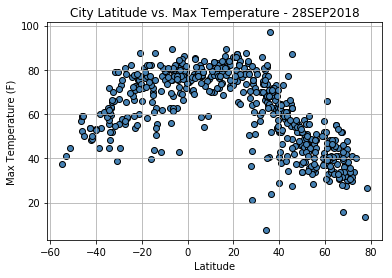

In [70]:
# Build a scatter plot for latitude and Max Temp
plt.scatter(weather_data["lat"], weather_data["max_temp"], marker="o", facecolor='steelblue', edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature - 28SEP2018")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Lat_MaxTemp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

In [49]:
weather_data['humidity'].describe()

count    550.000000
mean      80.267273
std       25.186290
min        3.000000
25%       70.000000
50%       83.000000
75%       94.000000
max      319.000000
Name: humidity, dtype: float64

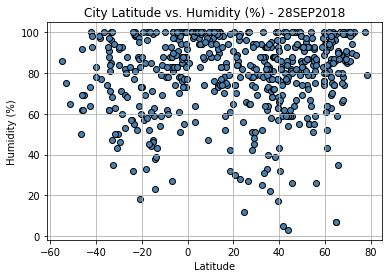

In [71]:
# Build a scatter plot for latitude and Humidity
#plt.scatter(weather_data["lat"], weather_data['humidity'], marker="o", facecolor='steelblue', edgecolor='black')
# Remove outliers and limit humidity to 100%
weathe_rm_hum_outl=weather_data.loc[weather_data['humidity'] <= 100,:]
plt.scatter(weathe_rm_hum_outl["lat"], weathe_rm_hum_outl['humidity'], marker="o", facecolor='steelblue', edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%) - 28SEP2018")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Lat_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

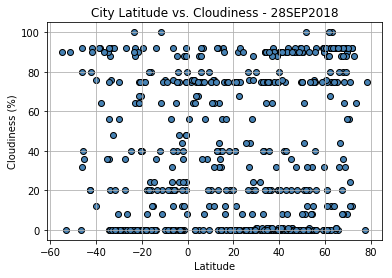

In [72]:
# Build a scatter plot for latitude and Cloudiness
plt.scatter(weather_data["lat"], weather_data['cloudiness'], marker="o", facecolor='steelblue', edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness - 28SEP2018")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Lat_Cloud.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

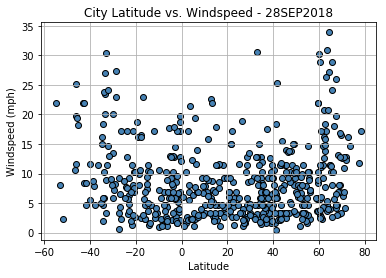

In [73]:
# Build a scatter plot for latitude and Windspeed
plt.scatter(weather_data["lat"], weather_data['WindSpeed'], marker="o", facecolor='steelblue', edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Windspeed - 28SEP2018")
plt.ylabel("Windspeed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Lat_WindSpeed.png")

# Show plot
plt.show()

In [74]:
#Additional Analysis
#Look at correlation between the different variables
print("Correlation of Latitude with other factors")
print(weather_data[["lat", "max_temp", "humidity", "cloudiness", "WindSpeed"]].corr())

#Look at absolute value of latitude
print("Correlation of distance from equator with other factors")
weather_data["dist_from_equator"]=weather_data["lat"].abs()
print(weather_data[["dist_from_equator", "max_temp", "humidity", "cloudiness", "WindSpeed"]].corr())

Correlation of Latitude with other factors
                 lat  max_temp  humidity  cloudiness  WindSpeed
lat         1.000000 -0.525043  0.003289    0.073543  -0.011983
max_temp   -0.525043  1.000000 -0.084733   -0.096478  -0.026916
humidity    0.003289 -0.084733  1.000000    0.287875  -0.044473
cloudiness  0.073543 -0.096478  0.287875    1.000000   0.152312
WindSpeed  -0.011983 -0.026916 -0.044473    0.152312   1.000000
Correlation of distance from equator with other factors
                   dist_from_equator  max_temp  humidity  cloudiness  \
dist_from_equator           1.000000 -0.791183 -0.080308    0.110688   
max_temp                   -0.791183  1.000000 -0.084733   -0.096478   
humidity                   -0.080308 -0.084733  1.000000    0.287875   
cloudiness                  0.110688 -0.096478  0.287875    1.000000   
WindSpeed                   0.204650 -0.026916 -0.044473    0.152312   

                   WindSpeed  
dist_from_equator   0.204650  
max_temp           -0.